必要なモジュールをインポートする

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
def fit_plane(x1, x2, y):
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)
    y = np.asarray(y)

    s_y1 = np.mean(y*x1) - np.mean(y)*np.mean(x1)
    s_y2 = np.mean(y*x2) - np.mean(y)*np.mean(x2)
    s_12 = np.mean(x1*x2) - np.mean(x1)*np.mean(x2)
    s_11 = np.var(x1)
    s_22 = np.var(x2)

    a_1 = (s_y1*s_22 - s_12*s_y2)/(s_11*s_22 - s_12**2)
    a_2 = (s_y2*s_11 - s_12*s_y1)/(s_11*s_22 - s_12**2)
    a_0 = np.mean(y) - a_1*np.mean(x1) - a_2*np.mean(x2)

    return np.array([a_1, a_2, a_0])

In [19]:
def fit_plane2(x1, y):
    x1 = np.asarray(x1)
    y = np.asarray(y)

    s_y1 = np.mean(y*x1) - np.mean(y)*np.mean(x1)
    s_11 = np.var(x1)

    a_1 = s_y1 / s_11
    a_0 = np.mean(y) - a_1 * np.mean(x1)
    return np.array([a_1, a_0])

In [20]:
def gosa(n, v):
    e = []
    a = np.random.normal(0, v, n)
    for i in range(100):
        e.append(round(a[i],3))

    return e

In [21]:
def get_x(n, r_min, r_max):
    x = []
    for i in range(100):
        x.append(random.randint(r_min,r_max))

    return x

In [22]:
def get_y(n, x_1, x_2):
    e = gosa(n, 8)
    y = []
    x_1 = np.asarray(x_1)
    x_2 = np.asarray(x_2)

    y1 = 5.14 * x_1 + 1.41 * x_2 + 5 + e

    for i in range(100):
        y.append(round(y1[i],3))

    return y

In [23]:
def sokan_x(n, x):
    x = np.asarray(x)
    x_o = x * 2.7

    return x_o

In [24]:
def sokan_x_e(n, x):
    e = gosa(n, 12)
    x = np.asarray(x)
    x_o = x * 2.7 + e

    return x_o 

In [25]:
x_1 = get_x(100, -3, 4)
x_2 = sokan_x_e(100, x_1)
y = get_y(100, x_1, x_2)

通常の場合 (three1.py)

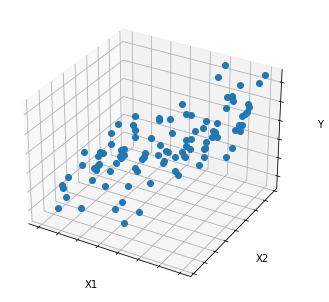

In [26]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None')
# ax.view_init(elev=90, azim=0)

# 回帰直面を描画する
a_1, a_2, a_0 = fit_plane(x_1, x_2, y)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

#ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.01, edgecolor='blue')

#ax.plot_surface(X_1, X_2, Y, alpha=0.01)

# 最後に.show()を書いてグラフ表示
plt.show()

通常の場合の回帰直面(three2.py)

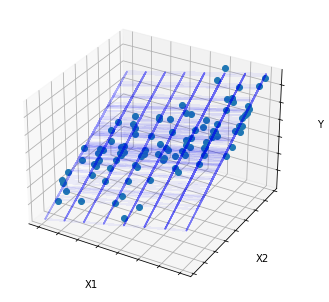

In [27]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None')

# 回帰直面を描画する
a_1, a_2, a_0 = fit_plane(x_1, x_2, y)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.05, edgecolor='blue')

#ax.plot_surface(X_1, X_2, Y, alpha=0.01)

# 最後に.show()を書いてグラフ表示
plt.show()

X1とX2の相関が大きい場合(three3.py)

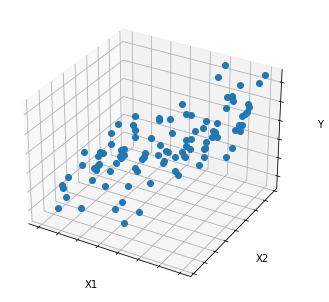

In [28]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None')

# 回帰直面を描画する
a = fit_plane(x_1, x_2, y)
a_1, a_2, a_0 = a
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

#ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.05, edgecolor='blue')

# 最後に.show()を書いてグラフ表示
plt.show()

X1とX2の相関が大きい場合の回帰直面(three4.py)

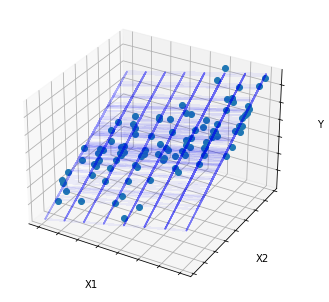

In [29]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None')

# 回帰直面を描画する
a = fit_plane(x_1, x_2, y)
a_1, a_2, a_0 = a
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.05, edgecolor='blue')

# 最後に.show()を書いてグラフ表示
plt.show()

X1とX2の相関が大きい場合に外れ値を加えた時の回帰直面の変化(three5.py)

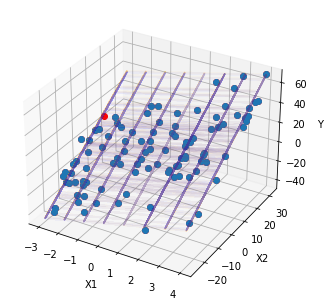

In [30]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)
# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
#ax.axes.xaxis.set_ticklabels([])
#ax.axes.yaxis.set_ticklabels([])
#ax.axes.zaxis.set_ticklabels([])

x_1 = get_x(100, -3, 4)
x_2 = sokan_x_e(100, x_1)
y = get_y(100, x_1, x_2)

# はずれち設定
x_1 = np.append(x_1, -2)
x_2 = np.append(x_2, 2)
y = np.append(y, 30)


# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None', color='red')

# 回帰直面を描画する
a_1, a_2, a_0 = fit_plane(x_1, x_2, y)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.03, edgecolor='orange')

x_1 = np.delete(x_1, 100)
x_2 = np.delete(x_2, 100)
y = np.delete(y, 100)

ax.plot(x_1,x_2,y,marker="o",linestyle='None')

# 回帰直面を描画する
a_1, a_2, a_0 = fit_plane(x_1, x_2, y)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.03, edgecolor='blue')

#ax.plot_surface(X_1, X_2, Y, alpha=0.01)

# 最後に.show()を書いてグラフ表示
plt.show()

通常の場合に外れ値を加えたときの回帰直面の変化(three6.py)

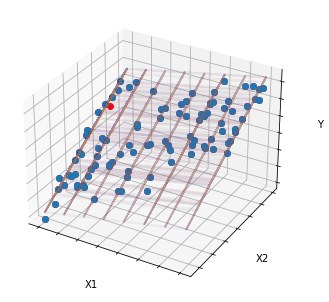

In [31]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)
# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

x_1 = get_x(100, -3, 4)
x_2 = sokan_x_e(100, x_1)
y = get_y(100, x_1, x_2)

# はずれち設定
x_1 = np.append(x_1, -2)
x_2 = np.append(x_2, 2)
y = np.append(y, 30)


# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None', color='red')

# 回帰直面を描画する
a_1, a_2, a_0 = fit_plane(x_1, x_2, y)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.03, edgecolor='blue')

x_1 = np.delete(x_1, 100)
x_2 = np.delete(x_2, 100)
y = np.delete(y, 100)

ax.plot(x_1,x_2,y,marker="o",linestyle='None')

# 回帰直面を描画する
a_1, a_2, a_0 = fit_plane(x_1, x_2, y)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_0

ax.plot_wireframe(X_1, X_2, Y, rstride=1, cstride=1, alpha=0.03, edgecolor='orange')

#ax.plot_surface(X_1, X_2, Y, alpha=0.01)

# 最後に.show()を書いてグラフ表示
plt.show()

X1とX2の相関係数が1である場合(three7.py)

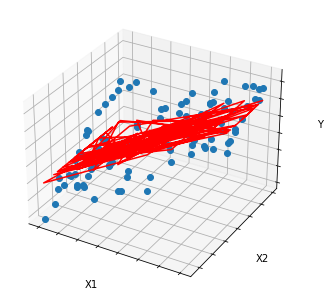

In [32]:
# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

# .plotで描画
ax.plot(x_1,x_2,y,marker="o",linestyle='None')

# 回帰直面を描画する
x_1 = np.asarray(x_1)
y = np.asarray(y)
a_1, a_0 = fit_plane2(x_1, y)
z = a_1*x_1 + a_0
ax.plot(x_1,x_2,z,marker='None', color='red')

# 最後に.show()を書いてグラフ表示
plt.show()